# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == i), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == i), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
import matplotlib.pyplot as plt # Импорт библиотеки для графиков.
import numpy as np # Импорт numpy для создания массива.

In [23]:
coef = [] # Список с коэффициентами.
numb_of_childs = [] # Список с количеством детей.
# Индексы списков совпадают по значению: Количетсво детей и отношению не выплаченныъ/выплаченных кредитов в срок.


for i in sorted(data['children'].unique()): # Итеририуем возможные варианты кол-ва детей. Также сортируем по возрастанию
    # для того что-бы в дальнейшем не выяснять какой коэффициент какому количеству детей соотвествует.
    
    x = data.loc[(data['children'] == i) & (data['debt'] == 1)].count() / \
      data.loc[(data['children'] == i) & (data['debt'] == 0)].count()   
    # Берём данные о детях у клиентов с долгом
    # Делим на такие же данные но уже у клиентов без долга.
    # Тем самым получаем коэффициент от 0 до 1 или другими словами вероятность возврата кредита в срок.
    # Переменную 'х' создал так-как не сообразил как вытащить только значение из получившегося датафрейма сразу.
    coef.append([x['children'].round(3)]) # Забор коэффициента из датафрейма 'х', и передача его в список.
    numb_of_childs.append(i) # Передача значения количества детей в список.

In [24]:
child_pivot = data.pivot_table(index='children', values='debt', aggfunc={'count', 'sum'})
child_pivot['count'] = child_pivot['count'] - child_pivot['sum']
child_pivot['coefficient'] = round(child_pivot['sum'] / child_pivot['count'], 3)
child_pivot.rename(columns = {'sum': 'debt'}, inplace=True)

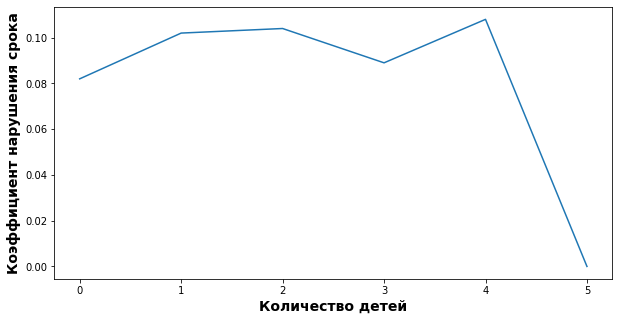

In [25]:
x = np.array(numb_of_childs)
y = np.array(coef)
plt.figure(figsize=(10,5))
plt.xlabel('Количество детей', fontsize=14, fontweight="bold")
plt.ylabel('Коэффициент нарушения срока', fontsize=14, fontweight="bold")
plt.plot(x,y)

print()

In [26]:
print('Количество детей, число людей без просрочки, число людей с просрочкой, и их соотношение.')
child_pivot

Количество детей, число людей без просрочки, число людей с просрочкой, и их соотношение.


,count,debt,coefficient
children,,,
0,13028,1063,0.082
1,4364,444,0.102
2,1858,194,0.104
3,303,27,0.089
4,37,4,0.108
5,9,0,0.000


**Вывод: Относительно клиентов без детей и до двух детей, график показывает что из ~92% клиентов без детей, готовых платить в срок, лишь ~2% в последствии теряют возможность возвращения кредита в срок, что в свою очередь говорит о небольшой зависимости.\
\
У клиентов с тремя детьми наблюдается обратная тенденция, вероятно имеет место быть гос. поддержка многодетных и малоимущих семей.\
\
Тем не менее у клиентов с 4 детьми наблюдается резкий рост, вероятно наблюдаем влияние не репрезентативной выборки, так как чем больше детей тем меньше имеем данных, к примеру клиентов с 5 детьми всего 9 человек, делать по ним выводы не имеет смысла.\
\
Взаимосвязь прослеживается**

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
table = data.pivot_table(index = ('family_status_id', 'family_status'), values = 'debt', aggfunc = {'count', 'sum'})
# Создаём сводную таблицу, в качестве индекса беру два значения что-бы в дальнейшем при построении графика не запутаться.
# В качестве значения берём булево значения долга, так как в значении мы имеем 0 и 1, мы можем просчитать общее количество
# значений и сумму значений всех 'True', подобная хитрость позволяет нам  вычислить а затем вытащить нужный нам коэффициент
# разделив сумму значений True на общее количество кредитов.
table['coef'] = round(table['sum'] / (table['count']  - table['sum']), 3)
table.rename(columns = {'sum': 'debt'}, inplace=True)
table = table.sort_values('coef') # Провожу предварительную сортировку по возрастанию для графика. Его так удобнее читать.

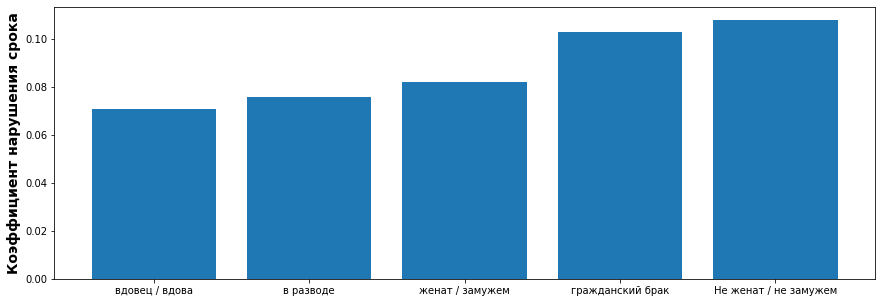

In [28]:
names = ['вдовец / вдова', 'в разводе', 'женат / замужем', 'гражданский брак', 'Не женат / не замужем']
# К сожалению список names пришлось заполнять вручную, я не понял как вытащить индексы датафрейма table для цикла..
values = []
for i in table['coef']: # Заполняю список values коэффициентами. 
     values.append(i)

plt.figure(figsize=(50, 5)) # Подстраиваю график под наши значения.
plt.subplot(131)
plt.ylabel('Коэффициент нарушения срока', fontsize=14, fontweight="bold")
plt.bar(names, values)
print()

In [29]:
print('Категория, число людей выплативших вовремя, число людей с просрочкой и их соотношение.')
table2 = table
table2

Категория, число людей выплативших вовремя, число людей с просрочкой и их соотношение.


,,count,debt,coef
family_status_id,family_status,,,
2,вдовец / вдова,951,63,0.071
3,в разводе,1189,84,0.076
0,женат / замужем,12261,927,0.082
1,гражданский брак,4134,385,0.103
4,Не женат / не замужем,2796,273,0.108


**График показывает коэфициент возврата долга в срок относительно семейного положения, категории отсортированны от более вероятной выплаты кредита в срок, до наименьшей.\
\
Вывод:\
\
На графике видно что категория 'вдовец/вдова' чаще других расплачиваются с кредитами в срок, вероятно связано с обогащением в виде наследства.\
\
Категория 'в разводе', успешность погашения кредитов относительно других вероятно связано с разделом/продажей совместно нажитого имущества от чего у людей появляется возможность выплатить кредит.\
\
Категория 'женат/замужем' семейные пары не редко вместе выплачивают один кредит чем можно и обусловить лишь не большой рост задолженностей относительно предидущих категорий.\
\
Категория 'гражданский брак', показывает более резкий рост, можно подумать что подобные пары распадаются чаще, что может приводить к определенным финансовым трудностям относительно взятых кредитов.\
\
Категория 'Не женат / не замужем' показатель не выплаты в срок почти в 10% от общей массы категории, что на треть выше первой категории, вероятно статистику данной категории в негативное русло загоняют авантюрные молодые люди взявшие кредит впервые, также можно предположить что в среднем люди этой категории имеют наименьший уровень ответственности, что в конечном итоге и ставит эту категорию на первое место по не выплатам в срок.\
\
Взаимосвязь прослеживается** 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [30]:
data['mean_income'] = data.groupby('total_income_category')['total_income'].transform(lambda x: x.mean())

coef = []
inc_cat = []
mean_cat = []

for i in sorted(data['total_income_category'].unique()):
    
    y = data[(data['total_income_category'] == i) & (data['mean_income'])]
    mean_cat.append(y['mean_income'].unique()[0]) # Захотелось добавить среднюю зп для большей наглядности, и тренировки.
    
    x = data[(data['total_income_category'] == i) & (data['debt'] == 1)].count() / \
    data[(data['total_income_category'] == i) & (data['debt'] == 0)].count()
    
    coef.append(x['debt'].round(3))
    inc_cat.append(i)

mean_cat = map(int, mean_cat)

table = pd.DataFrame(list(zip(inc_cat, mean_cat, coef)), columns=['категория', 'средняя з/п', 'коэффициент'])

for i in sorted(data['total_income_category'].unique()):
    f = data[data['total_income_category'] == i].groupby('income_type')
    print(i)
    print(f['income_type'].count())             # Цикл написал что-бы посмотреть кого сколько и в каких категориях.
    print(f['income_type'].count().sum())
    print()

A
income_type
компаньон    15
сотрудник    10
Name: income_type, dtype: int64
25

B
income_type
безработный           1
госслужащий         366
компаньон          1733
пенсионер           552
предприниматель       2
сотрудник          2360
Name: income_type, dtype: int64
5014

C
income_type
безработный       1
в декрете         1
госслужащий    1060
компаньон      3273
пенсионер      3081
сотрудник      8504
студент           1
Name: income_type, dtype: int64
15921

D
income_type
госслужащий     24
компаньон       25
пенсионер      164
сотрудник      136
Name: income_type, dtype: int64
349

E
income_type
госслужащий     1
компаньон       1
пенсионер      15
сотрудник       5
Name: income_type, dtype: int64
22



In [31]:
inc_pivot = data.pivot_table(index='total_income_category', values='debt', aggfunc={'count', 'sum'})
inc_pivot['coef'] = round(inc_pivot['sum'] / (inc_pivot['count'] - inc_pivot['sum']), 3)
inc_pivot.rename(columns = {'sum': 'debt'}, inplace=True)

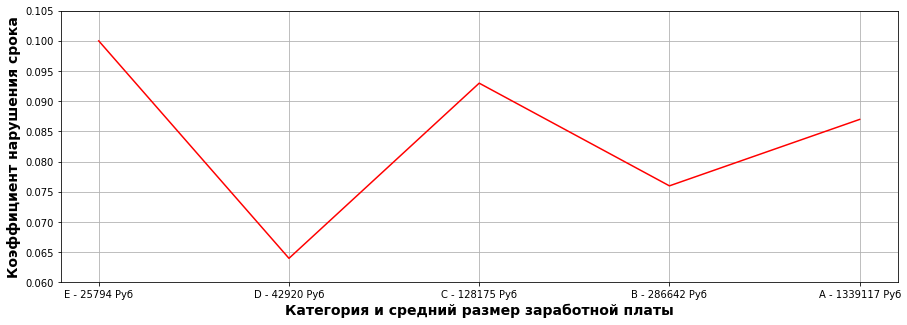

In [32]:
cat_mean_inc = []
for i in range(len(inc_cat)):
    cat_mean_inc.append(inc_cat[i] + ' - ' + str(table['средняя з/п'].loc[table.index[i]]) + ' Руб')
    # Совместил списки категорий и средних зп, для большей наглядности на графике.
    # Мне пришлось вытаскивать значения зп из таблицы так как функция мэп что-то там сделала со списком))
    # Лишь позже подумал о генераторе списков. Ну что-ж первый блин комом.
    

plt.figure(figsize=(15, 5))
plt.ylim([0.06, 0.105])
plt.grid()
plt.xlabel('Категория и средний размер заработной платы', fontsize=14, fontweight="bold")
plt.ylabel('Коэффициент нарушения срока', fontsize=14, fontweight="bold")
plt.plot(cat_mean_inc, coef, 'r')
plt.gca().invert_xaxis()
plt.show()

In [33]:
print('Категория, число людей без долга, с долгом и их соотношение.')
inc_pivot

Категория, число людей без долга, с долгом и их соотношение.


,count,debt,coef
total_income_category,,,
A,25,2,0.087
B,5014,354,0.076
C,15921,1353,0.093
D,349,21,0.064
E,22,2,0.100


**Вывод: Категория E - Категория с самым низким доходов, испытывают больше финансовых трудностей чем другие категории чем и обуславливается наибольший из всех категорий коэффициент нарушения срока кредита. Стоит добавить что выборка не репрезентативана и составаляет всего 22 человека\
\
Категория D - Объяснить минимальный коэффициент можно тем то что в данной категории граждан относительно нашей выборки, находится значительно больше пенсионеров чем в других категориях, то-есть вероятно поддержка со стороны позровслевших детей оказывает положительный эффект относительно отдачи кредита в срок.\
\
Категории C и B - Которые корректнее всего можно сравнивать относительно заработка так-как имеем похожее соотношение 
типа доходов, график показывает то что чем больше люди зарабатывают в данных категориях тем чаще они расплачиваются с кредитами в срок что в свою очередь естественно.\
\
Категория A - Обратную тенденцую относительно категорий С и B, можно объяснить не репрезентативной выборкой всего в 25 человек.\
\
Взаимосвязь прослеживается**

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [34]:
pdata = data.pivot_table(index='purpose_category', values='debt', aggfunc={'count', 'sum'})
pdata['coef'] = sorted(round(pdata['sum'] / (pdata['count'] - pdata['sum']),3))
# Код используется в дальнейшем потому не удалил. Для выведения таблицы написал отдельный код.

for i in sorted(data['total_income_category'].unique()):
    f = data[data['total_income_category'] == i].groupby('purpose_category')
    print(i)
    print(f['purpose_category'].count())        
    print(f['purpose_category'].count().sum())
    print()

A
purpose_category
операции с автомобилем       2
операции с недвижимостью    17
получение образования        4
проведение свадьбы           2
Name: purpose_category, dtype: int64
25

B
purpose_category
операции с автомобилем      1022
операции с недвижимостью    2558
получение образования        890
проведение свадьбы           544
Name: purpose_category, dtype: int64
5014

C
purpose_category
операции с автомобилем      3181
операции с недвижимостью    7997
получение образования       3014
проведение свадьбы          1729
Name: purpose_category, dtype: int64
15921

D
purpose_category
операции с автомобилем       72
операции с недвижимостью    168
получение образования        75
проведение свадьбы           34
Name: purpose_category, dtype: int64
349

E
purpose_category
операции с автомобилем       2
операции с недвижимостью    11
получение образования        5
проведение свадьбы           4
Name: purpose_category, dtype: int64
22



In [35]:
target_pivot = data.pivot_table(index='purpose_category', values='debt', aggfunc={'count', 'sum'})
target_pivot['coef'] = sorted(round(target_pivot['sum'] / (target_pivot['count'] - target_pivot['sum']), 3))
target_pivot.rename(columns = {'sum': 'debt'}, inplace=True)

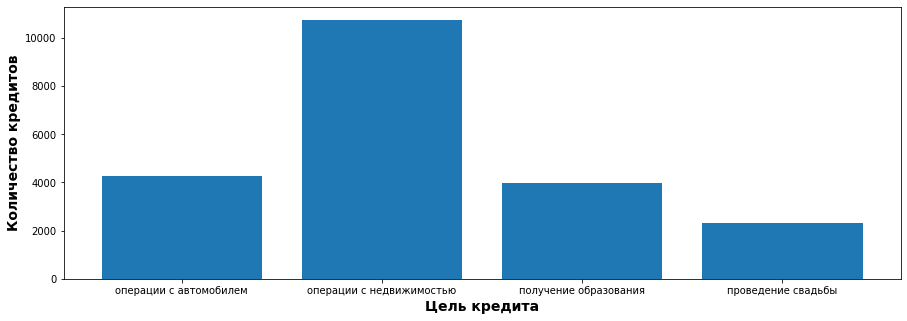

In [36]:
plt.figure(figsize=(15, 5))
plt.xlabel('Цель кредита', fontsize=14, fontweight="bold")
plt.ylabel('Количество кредитов', fontsize=14, fontweight="bold")
plt.bar(sorted(data['purpose_category'].unique()), data.groupby('purpose_category')['purpose_category'].count())
plt.show()

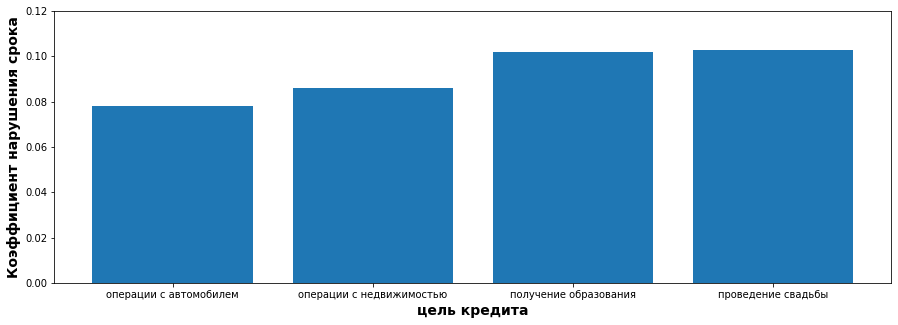

In [37]:
plt.figure(figsize=(15, 5))
plt.ylim([0, 0.12])
plt.xlabel('цель кредита', fontsize=14, fontweight="bold")
plt.ylabel('Коэффициент нарушения срока', fontsize=14, fontweight="bold")
plt.bar(sorted(data['purpose_category'].unique()), sorted(pdata['coef']))
plt.show()

In [38]:
print('Цели, число людей без долга, с долгом, и их соотношение.')
target_pivot

Цели, число людей без долга, с долгом, и их соотношение.


,count,debt,coef
purpose_category,,,
операции с автомобилем,4279,400,0.078
операции с недвижимостью,10751,780,0.086
получение образования,3988,369,0.102
проведение свадьбы,2313,183,0.103


**Вывод: Взаимосвязь определенно прослеживается, операции с авто и недвижимостью имеют самые низкие риски из представленных.\
\
Можно предположить что в среднем подобные операции проводят люди с лучшей дальновидностью чем те кто берут кредит на свадьбу.\
\
Взятие кредита на получение образования и не отдачи в срок можно обусловить с не простым финансовым положением, а также сама по себе трата времени на образование уменьшает вероятность того что человек будет подрабатывать как на основной работе так и пытаться получить другие источники дохода, что в свою очередь наносит ещё больший ущерб и в без того в не самое простое положение.** 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ: Человеческий фактор. \
\
А также микросбои программ при редактировании таблиц связанных с тем что некие космические частицы при попадании по транзистору процессора могут привести к изменению значения 0 на 1 в двоичном коде. Незнаю наверняка но думаю в огромнных массивах такое происходит регулярно.* 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ: Медианное значение уменьшает влияние большого разброса в количественных значениях, из-за которого в свою очередь можно не верно интерпретировать данные.* 

### Шаг 4: общий вывод.

##                              Общий вывод:
### Предобработка данных:
#### Удаление пропусков.
* *Были обнаружены пропуски в двух столбцах - days_employed(Стаж в днях) и total_income(Размер ежемесячного дохода в рублях).*
* *В пропуски были вставленны медианные значения столбцов в зависимости от категории income_type(Тип занятости).*
#### Обработка аномальных значений.
* *В значениях days_employed были обнаружены отрицательные значения, исправлены путём взятия числа в модуль.*
* *Также в столбце children присутствовали отрицательные числа, и аномально большое количество детей(20), строки изъяты из таблицы.*
#### Изменение типов данных.
* *В столбце total_income присутствовали строковые типы данных содержащие в себе цифры, исправлено путём изменения типа данных на int.*
#### Обработка дубликатов.
* *Обработка велась путём приведения регистра строк в lower.*
* *Дубликаты дропнуты из таблицы функцией pandas(drop_duplicates).*
#### Категоризация данных.
* *Данные были подвергнуты разделению на категории в зависимости от количества детей, ежемесячного дохода, семейного положения и целей кредита.*

### Исследование данных на предмет:
#### Есть ли зависимость между количеством детей и возвратом кредита в срок.

* **Исследование показало зависимость от кол-ва детей.**

* *При отсутствии детей у заёмщиков соотношение должников к выплатившим в срок состовляет 0.082*

* *При наличии одного и двух детей соотношение увеличивается до 0.102 и 0.104, что может говорить о усложнении финансового положения заёмщиков.*

* *Рождение третьего ребёнка снижает соотношение до 0.089, что можно обусловить гос. поддержкой многодетных семей.*

* *Для выведения корректного соотношения при наличии трёх и более детей необходимо большее количество данных.*

#### Есть ли зависимость от семейным положением и возвратом кредита в срок.

* **Исследование показало зависимость от семейного положения**
* *В категориях 'не женат / не замужем', 'гражданский брак' соотношение должников к выплатившим в срок состовляет 0.108 и 0.103 соответственно. В данных категориях самый высокий процент должников*
* *В Категории 'женат / замужем' соотношение составляет 0.082, что говорит о том что пары находящиеся в браке более надёжны в плане займов.*
* *Категории 'в разводе' и 'вдовец / вдова' показывают лучшее соотношение равное 0.076 и 0.071 соответственно, вероятно имеет место влияние раздела имущества или вступление в наследство.*


#### Есть ли зависимость от уровня доходов и возвратом кредита в срок.
* **Исследование показало зависимость от уровня доходов**
* *Категории граждан разделены на пять категорий в зависимости от медианной уровня дохода в месяц, также в каждой категории по отдельности взята средняя з/п 'A - 1339 т.руб', 'B - 286 т.руб', 'C - 128 - т.руб', 'D - 42 т.руб', 'E - 25 т.руб.'*
* *Исследование показало что чем больше люди зарабатывают тем чаще выплачивают кредит в срок*
* *Соотношение должников к выплачивающим в срок.*
* *Категория E - 0.100*
* *Категория D - 0.064*
* *Категория C - 0.093*
* *Категория B - 0.076*
* *Категория А - показывает аномальное значение 0.087, обусловлена не репрезентативной выборкой всего в 9 заёмщиков.*
* *Единственная категория не попадающая под это утверждение категория D, было дополнительно выяснено что в данной категории значительно преобладающее количество пенсионеров в соотношении относительно других категорий что приводит к данной аномалии. Вероятна помощь с выплатами кредитов повзровслевших детей.*

#### Есть ли зависимость от целей кредита и возвратом кредита в срок.
* **Исследование показало зависимость от целей кредита**
* *Цели кредита разделены на 4 категории, 'операции с автомобилем', 'операции с недвижимостью', 'получение образования', 'проведение свадьбы'*
* *Примерно половину всех заёмщиков состовляют состоят из категории 'операции с недвижимостью' с соотношением должников к выплачивающим в срок в 0.086. В целом благодаря массовости можно считать данную категорию самой выгодной в плане данных займов.*
* *Операции с автомобилем показывает соотнешние в 0.078, и имеет самый высокий коэффициент отдачи кредита в срок среди данных категорий*
* *Категории 'получения образования' и 'проведение свадьбы' имеют примерно одинаковое и самое худшее соотношение в 0.102 и 0.103 соответственно, обусловить можно тем что в получении образования в среднем нуждаются люди с не простым финансовым положением, а само получение образования отнимает время которое могло бы пойти на поиск дополнительного дохода. Кредиты на проведение свадьбы зачастую могут не выплачиваться в срок по причине раннего расторжения брака.*